In [7]:
# Cycles through the data indefinitely
# until it manages to correctly classify.
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Multi Layer Perceptron Class

In [8]:
class MultiLayerPerceptron:
    """
    train_data: 4x2 matrix as the input
    target: 4x1 matrix as the expected output
    alpha: as the learning rate, default is 0.01
    
    num_epochs: the number of times the training data goes through the model while training
    num_input: the number of nodes in the hidden layer of the MultiLayerPerceptron.
                Should be equal to the second dimension of train_data.
    num_output: the number of nodes in the output layer of the MultiLayerPerceptron.
                Should be equal to the second dimension of target.
    """
    def __init__(self, train_data, target, alpha=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.alpha = alpha
        self.num_epochs = num_epochs

        # init sets of weight and bias randomly
        """
            - weight_01: weight between input and hidden layer
            - weight_12: weight between hidden and output layer
            - bias_01: bias for the hidden layer
            - bias_12: bias for the output layer
        """
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

        self.bias_01 = np.random.uniform(size=(1, num_hidden))
        self.bias_12 = np.random.uniform(size=(1, num_output))

        self.losses = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _delsigmoid(self, x):
        return x * (1 - x)

    def update_weights(self):
        # calculate the squared error
        loss = 0.5 * (self.target - self.output_final) ** 2
        # print(loss)
        self.losses.append(np.sum(loss))

        error_term = (self.target - self.output_final)

        # gradient hidden layer weights
        grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out))
        # print('grad01: ', grad01)
        # print(grad01.shape)

        # gradient output layer weights
        grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))
        # print('grad12: ', grad12)
        # print(grad12.shape)

        # update the weight
        self.weights_01 += self.alpha * grad01
        self.weights_12 += self.alpha * grad12

        # update the bias
        self.bias_01 += np.sum(self.alpha * ((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out), axis=0)
        self.bias_12 += np.sum(self.alpha * error_term * self._delsigmoid(self.output_final), axis=0)

    def forward(self, batch):
        self.hidden_ = np.dot(batch, self.weights_01) + self.bias_01    
        self.hidden_out = self._sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.bias_12
        self.output_final = self._sigmoid(self.output_)

        return self.output_final

    def classify(self, datapoint):
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1
        return 0

    def plot(self, h=0.01):
        # generate plot and decision boundary
        sns.set_style('darkgrid')
        plt.figure(figsize=(20, 20))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {0: 'ro', 1: 'go'}

        # plot the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]], [self.train_data[i][1]], colors[self.target[i][0]], markersize=20)
        
        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # create mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        plt.contour(xx, yy, Z, colors=['red', 'green', 'blue'], alpha=0.4)

    def train(self):
        # A forward pass is done first, followed by a backprop
        # where the net parameter's are updated

        for epoch in range(self.num_epochs):
            self.forward(self.train_data)
            self.update_weights()

            if epoch % 500 == 0:
                print('Loss: ', self.losses[epoch])

# Dataset and the target XOR

In [9]:
# data 4x2 matrix
train_data = np.array([
[0, 0], 
[0, 1], 
[1, 0], 
[1, 1]])

target_xor = np.array([
[0], 
[1], 
[1], 
[0]])

# Training the data

In [10]:
mlp = MultiLayerPerceptron(train_data, target_xor, 0.2, 8000)
mlp.train()

Loss:  0.6107122172303839
Loss:  0.4956293969867527
Loss:  0.4634512204131491
Loss:  0.37751311136005605
Loss:  0.27282964371135765
Loss:  0.07215528714511543
Loss:  0.02721132882370886
Loss:  0.01546198771371543
Loss:  0.010521521031577361
Loss:  0.0078794782523162
Loss:  0.006256940024097913
Loss:  0.005167633271150272
Loss:  0.00438955310609524
Loss:  0.0038078912207298644
Loss:  0.0033576573413319774
Loss:  0.002999449221302978


# Plotting the loss function

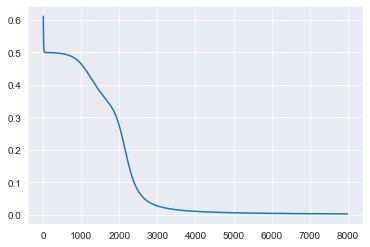

In [11]:
_ = plt.plot(mlp.losses)

# Plot the data including the boundary decision

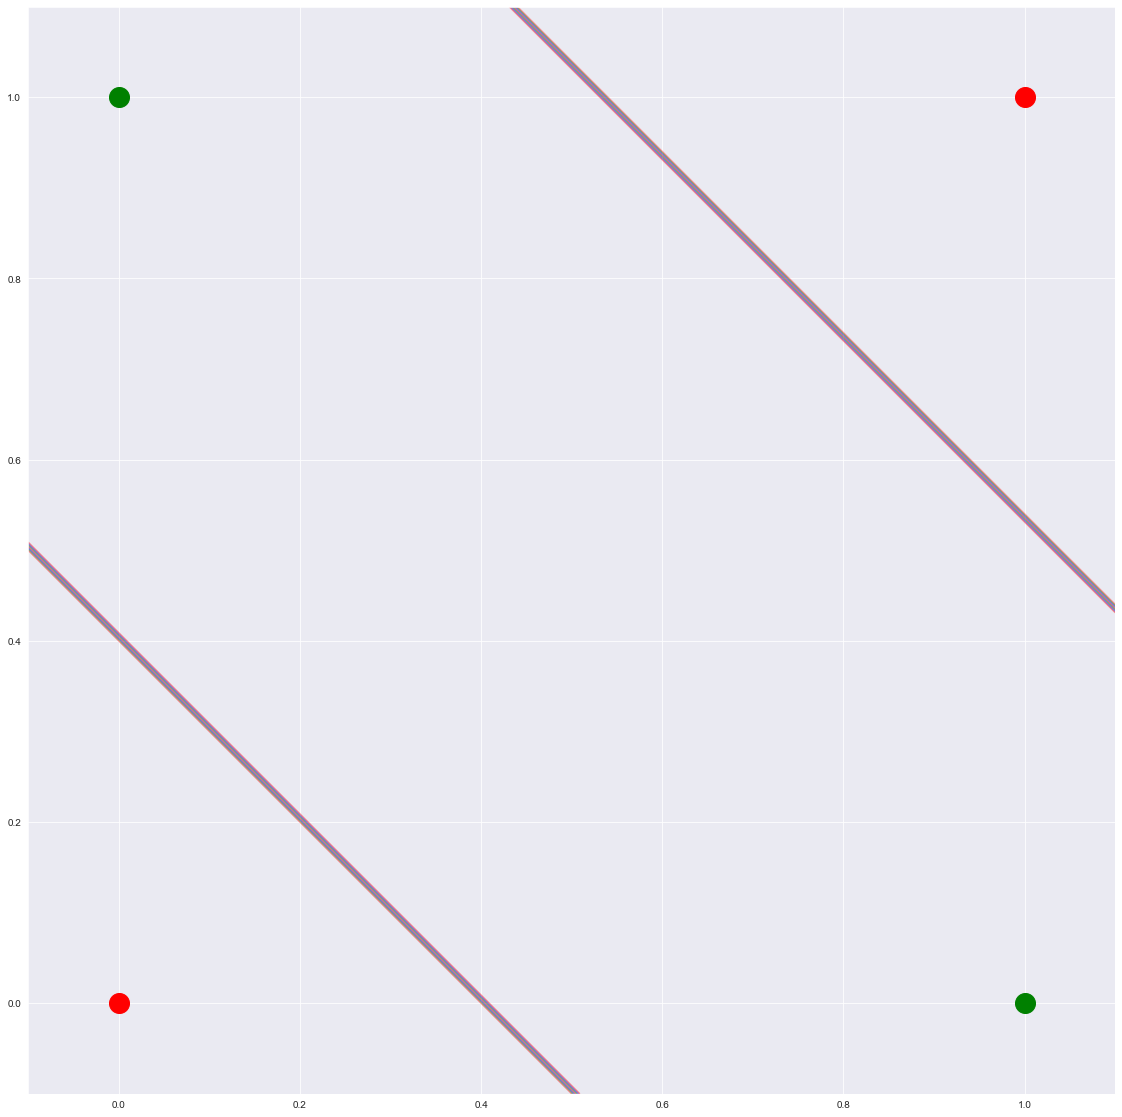

In [12]:
mlp.plot()